In [24]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

#membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Mall_Customers.csv')

#tampilkan 3 baris pertama
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [25]:
#ubah nama kolom
data = data.rename(columns = {'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
#ubah data katagorik menjadi data numerik
data['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
    
#tampilan data yang sudah di preprocess
data.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [26]:
#menghilangkan kolom customer id dan gender
X = data.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inersia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

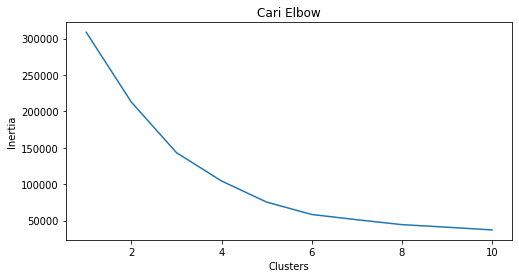

In [27]:
#membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/home/diki/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


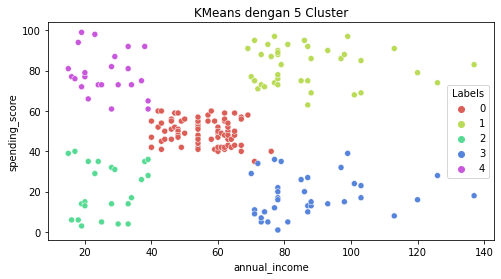

In [29]:
#membuat objek KMeans
km5 = KMeans(n_clusters = 5).fit(X)

#menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

#membuat plot KMeans dengan 5 kluster
plt.figure(figsize = (8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue = X['Labels'],
                   palette = sns.color_palette('hls', 5))
plt.title("KMeans dengan 5 Cluster")
plt.show()